## Final Project Submission

Please fill out:
* Student name: Andy Martin del Campo
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Victor
* Blog post URL:


### Project Steps I think

1. Get Data
2. Clean Data
    a. Make sure all data is the right type
    b. Make sure there are no NaN values
    c. Check for duplicates
    d. Check for outliers
    e. Normalize
3. Figure out which features are important
    a. Check for correlation
    b. RFE
4. Model

look up Crisp-DM and OSEMN

# Getting the data


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')

In [4]:
#brief look at data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [43]:
#get info on columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## First Assumptions
- It looks like the data all has the same number of entries. 

## Next Steps
-Clean data

-Go through and check each column for NaN values or any other interesting inputs


# Cleaning the Data

In [6]:
#check for NaN values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

- It appears that 'waterfront', 'view', and 'yr_renovated' have Nan values. 
- next step is to see if the Nan values are significant for each column and see if we can replace them with something meaningful


In [40]:
print(df.yr_renovated.unique())
print(df.yr_renovated.value_counts())

[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0 

## What to do next?
-Test the relevance of the features to see if they are even worth bothering with.

-Keep only features with a Pearson Correlation above 0.5.

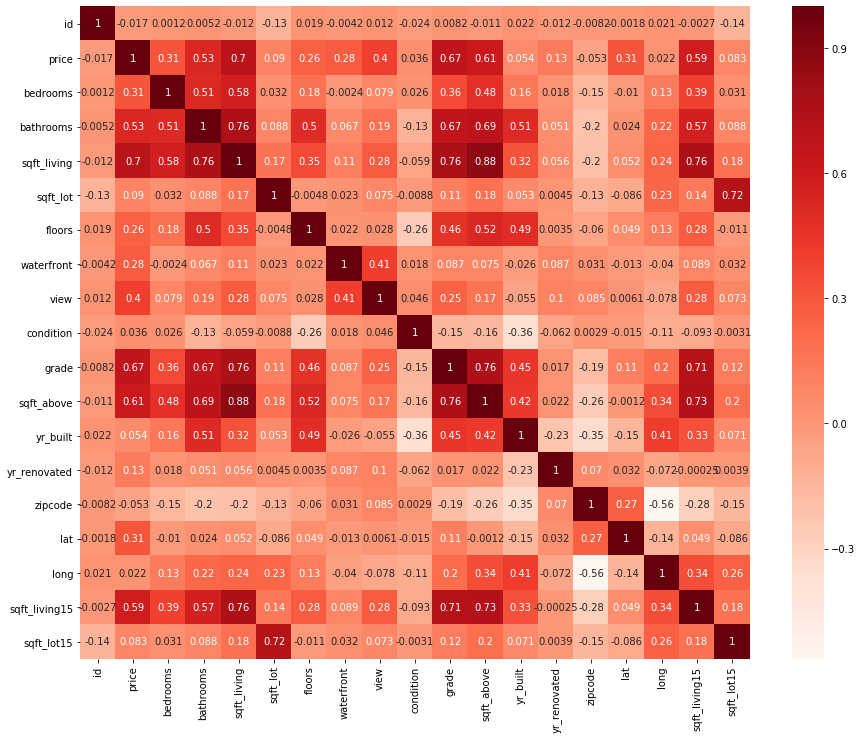

In [36]:
plt.figure(figsize=(15,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [37]:
#The correlation target should be the 'price'
cor_target = abs(cor['price'])

#Selecting highly correlated features
features = cor_target[cor_target>0.5]
features

price            1.000000
bathrooms        0.525906
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
Name: price, dtype: float64

## What is the best approach here? Does NaN mean 0 or not on the waterfront? Or is the data 'missing'?


In [27]:
#look at the mean of 0, and 1 for waterfront. Then switch NaN to 0 and test again. See if they are similar
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [26]:
#check all values of 'waterfront'
print(df.waterfront.nunique())
print(df.waterfront.unique())
print(df.waterfront.value_counts())

2
[0. 1.]
0.0    21451
1.0      146
Name: waterfront, dtype: int64


In [9]:
df_test = df.copy()
df_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [10]:
#set all NaN waterfront values to 0
def nan_replace(value):
    if value == 1:
        return value
    elif value == 0:
        return value
    else:
        return 0
    
df_test.waterfront = df_test.waterfront.map(lambda x: nan_replace(x))

In [11]:
df_test.isna().sum()
print(df_test.waterfront.nunique())
print(df_test.waterfront.unique())
print(df_test.waterfront.value_counts())

2
[0. 1.]
0.0    21451
1.0      146
Name: waterfront, dtype: int64


In [15]:
df_test.groupby('waterfront').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
waterfront,,,,,,,,,,,,,,,,,,
0.0,4.581329e+09,5.322862e+05,3.373363,2.111790,2072.396485,15026.095846,1.493170,0.209781,3.408932,7.649900,1783.695259,1971.059018,80.940172,98077.824157,47.560232,-122.213546,1981.881777,12689.299753
1.0,4.454969e+09,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,3.786207,3.541096,8.835616,2508.760274,1962.280822,476.628099,98096.712329,47.539677,-122.278164,2682.828767,22893.698630


In [16]:
df.groupby('waterfront').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
waterfront,,,,,,,,,,,,,,,,,,
0.0,4.593352e+09,5.326420e+05,3.374836,2.112543,2073.524404,14991.120210,1.493997,0.203954,3.408965,7.652058,1785.875125,1971.106841,79.280087,98077.591140,47.560078,-122.213552,1982.052949,12729.486186
1.0,4.454969e+09,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,3.786207,3.541096,8.835616,2508.760274,1962.280822,476.628099,98096.712329,47.539677,-122.278164,2682.828767,22893.698630


### Observations
- Comparing the mean and other values between setting 'NaN' to 0 for 'waterfront' shows that they were probably meant to be 0 but were input as 'NaN'
- I am now going to set the values to 0 in the df DataFrame

In [19]:
df.waterfront = df.waterfront.map(lambda x: nan_replace(x))
print(df.waterfront.isna().sum())

0


## Next up is the 'view' column

In [22]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [24]:
print(df.view.nunique())
print(df.view.unique())
print(df.view.value_counts())

5
[ 0. nan  3.  4.  2.  1.]
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


## Make 'sqft_basement' into a float